# Import Libraries and Warnings

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Import data (.csv) as data frame

In [59]:
df= pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Find Data details

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


#### Analysis:

#### 1) Data type of Date column is object---->>> Need to convert into DateTime Format.
#### 2) Data has no non-null values in any column i.e. there are no missing data in the table and the total number of the data is 7560.
#### 3) There are two columns having integer values - Unit & Sales.
#### 4) There is no negative values in any column.

In [61]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

#### Analysis:

#### 1) Another way to show that data frame has no non-null values in any column i.e. there are no missing data in the data frame.

#### Since, there is no missing data/incorrect data, no need to peform following task:

#### Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).

In [62]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

#### Analysis:

#### 1) Another way to show that all the columns of data frame has values i.e. there are no missing data in the data frame.

#### Since, there is no missing data/incorrect data, no need to peform following task:

#### Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).

In [63]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


#### Analysis:

#### 1) The huge difference between min & median value and max & median value shows that outliers must be present in the both columns ------>> Need to treat data for outlier values.

<Axes: xlabel='Unit', ylabel='Count'>

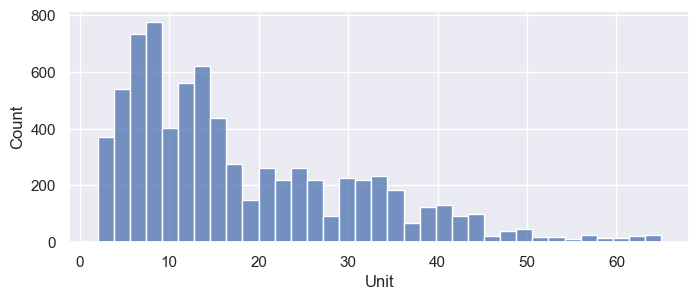

In [64]:
sns.histplot(data=df, x='Unit')

#### Analysis:

#### The above plot indicates that the data in the Unit column has a right-skewed distribution.

<Axes: xlabel='Sales', ylabel='Count'>

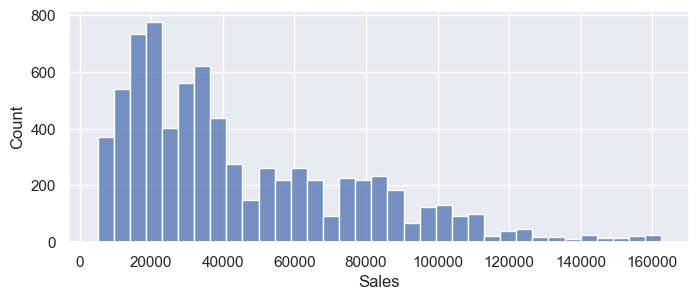

In [65]:
sns.histplot(data=df, x='Sales')

#### Analysis:

#### The above plot indicates that the data in the Sales column has a right-skewed distribution.

In [66]:
df.duplicated().sum()

0

#### Analysis:

#### 1) This shows that data frame has no duplicated values present.

In [67]:
print('Time: ',df.Time.unique(),'\n','States:', df.State.unique(),'\n', 'Group: ', df.Group.unique())

Time:  [' Morning' ' Afternoon' ' Evening'] 
 States: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS'] 
 Group:  [' Kids' ' Men' ' Women' ' Seniors']


#### Analysis:

#### 1) This shows the unique values present in the Time, State and Group columns respectively.

# Data cleaning

### Converting Date column into DateTime Format

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


### Checking for outliers using Box-Plot Technique

#### Copying original DataFrame

In [69]:
df1=df.copy(deep=True)
df1.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


#### Analysis:

#### Here, new dataframe df1 is created as a copy of the original data frame df to perform outlier treatment. So, df1 will be the cleaned data frame without any outliers.

#### Outliers in the Unit column

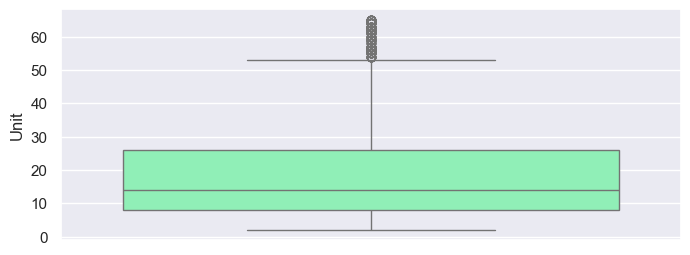

In [70]:
sns.boxplot(y='Unit',data=df, palette='rainbow')
plt.show()

In [71]:
Unit_q1,Unit_q3 = df['Unit'].quantile([0.25,0.75])
Unit_iqr=Unit_q3-Unit_q1
Unit_min=Unit_q1-1.5*Unit_iqr
Unit_max=Unit_q3+1.5*Unit_iqr
print('Q1: ',Unit_q1,'\n','Q3: ',Unit_q3,'\n','IQR:',Unit_iqr,'\n','MIN: ',Unit_min,'\n','MAX:',Unit_max)

Q1:  8.0 
 Q3:  26.0 
 IQR: 18.0 
 MIN:  -19.0 
 MAX: 53.0


#### Analysis:

#### We can observe that data above 53 in the Unit column are outliers using the box-plot technique and we have to treat them. 

In [72]:
# Limit vlaues of the Unit column between Min and max values.

df1['Unit']=np.clip(df['Unit'],a_min=Unit_min,a_max=Unit_max)
df1.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,17.897619,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,53.000000,162500.000000
std,NaN,12.568314,32253.506944


<Axes: xlabel='Unit', ylabel='Count'>

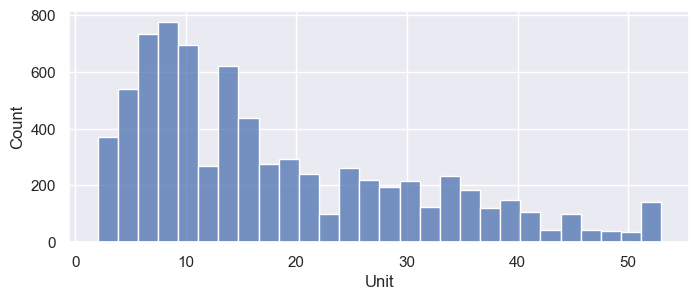

In [73]:
sns.histplot(data=df1, x='Unit')

#### Analysis:

#### We can observe that the data in the Unit Column has been treated and MAX value is limited to 53 in the Unit column.

#### For Sales column

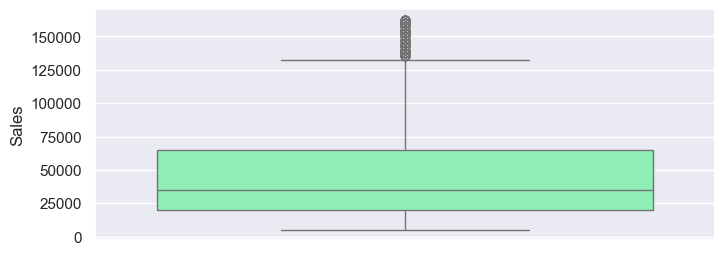

In [74]:
sns.boxplot(y='Sales',data=df, palette='rainbow')
plt.show()

In [75]:
Sales_q1,Sales_q3 = df['Sales'].quantile([0.25,0.75])
Sales_iqr=Sales_q3-Sales_q1
Sales_min=Sales_q1-1.5*Sales_iqr
Sales_max=Sales_q3+1.5*Sales_iqr
print('Q1: ',Sales_q1,'\n','Q3: ',Sales_q3,'\n','IQR: ',Sales_iqr,'\n','MIN: ',Sales_min,'\n','MAX: ',Sales_max)

Q1:  20000.0 
 Q3:  65000.0 
 IQR:  45000.0 
 MIN:  -47500.0 
 MAX:  132500.0


#### Analysis:

#### We can observe that data above 132.5K in the Sales column are outliers using the box-plot technique and we have to drop them. 

In [76]:
#Drop outliers

outliers_index = np.where((df['Sales']>Sales_max) | (df['Sales']<Sales_min))[0]
df1.drop(index=outliers_index, inplace=True)
df1.describe()

,Date,Unit,Sales
count,7437,7437.000000,7437.00000
mean,2020-11-14 15:42:11.181927936,17.317063,43292.65833
min,2020-10-01 00:00:00,2.000000,5000.00000
25%,2020-10-23 00:00:00,8.000000,20000.00000
50%,2020-11-15 00:00:00,14.000000,35000.00000
75%,2020-12-07 00:00:00,25.000000,62500.00000
max,2020-12-30 00:00:00,53.000000,132500.00000
std,NaN,11.826102,29565.25541


<Axes: xlabel='Sales', ylabel='Count'>

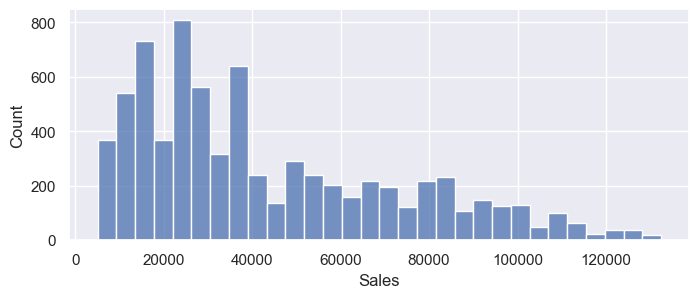

In [77]:
sns.histplot(data=df1, x='Sales')

#### Analysis:

#### We can observe that the data in the Sales Column has been treated and MAX value is limited to 132.5K. Values greater than 132.5K  have been removed.

In [78]:
pd.DataFrame([df.groupby('Group').count()['Sales'], df1.groupby('Group').count()['Sales']],index = ['before','after'])

Group,Kids,Men,Seniors,Women
before,1890,1890,1890,1890
after,1865,1860,1854,1858


#### Analysis:

#### We can clearly see that all the four groups have removed some values in order to drop outliers. 

# Normalisation

In [79]:
df['Normalised_Unit'] = MinMaxScaler().fit_transform(df[['Unit']])
df['Normalised_Sales'] = MinMaxScaler().fit_transform(df[['Sales']])
df.describe()

,Date,Unit,Sales,Normalised_Unit,Normalised_Sales
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


# Data Analysis

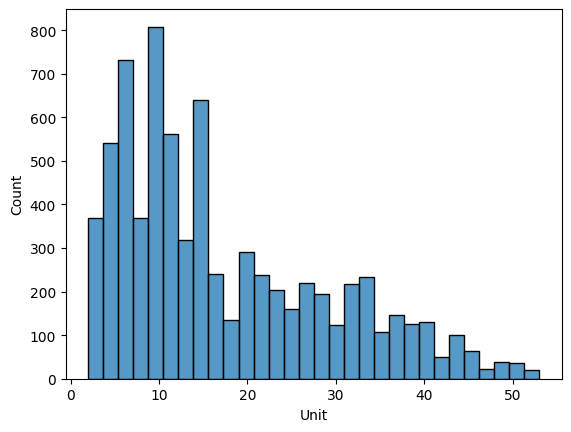

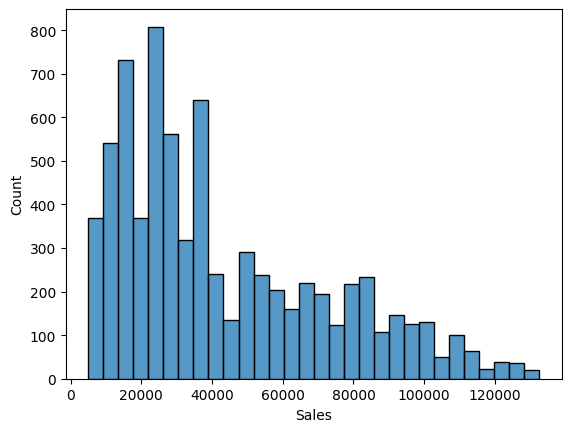

In [30]:
sns.histplot(data=df1, x='Unit')
plt.show()
sns.histplot(data=df1, x='Sales')
plt.show()

In [31]:
df1[['Unit','Sales']].mean()

Unit        17.317063
Sales    43292.658330
dtype: float64

In [32]:
df1[['Unit','Sales']].median()

Unit        14.0
Sales    35000.0
dtype: float64

In [33]:
df1[['Unit','Sales']].mode()

,Unit,Sales
0,9,22500


In [34]:
df1[['Unit','Sales']].std()

Unit        11.826102
Sales    29565.255410
dtype: float64

In [35]:
#Finding Group generating Highest & Lowest sales using mean value
Grouped_sales = df1.groupby('Group')['Sales'].mean()
print(Grouped_sales,'\n')
highest_sales = df1.groupby('Group')['Sales'].mean().idxmax()
lowest_sales = df1.groupby('Group')['Sales'].mean().idxmin()
print('The group generating the highest sales is: ', highest_sales,'\n','The group generating the lowest sales is: ', lowest_sales)

Group
Kids       43628.686327
Men        43717.741935
Seniors    42420.442287
Women      43400.161464
Name: Sales, dtype: float64 

The group generating the highest sales is:   Men 
 The group generating the lowest sales is:   Seniors


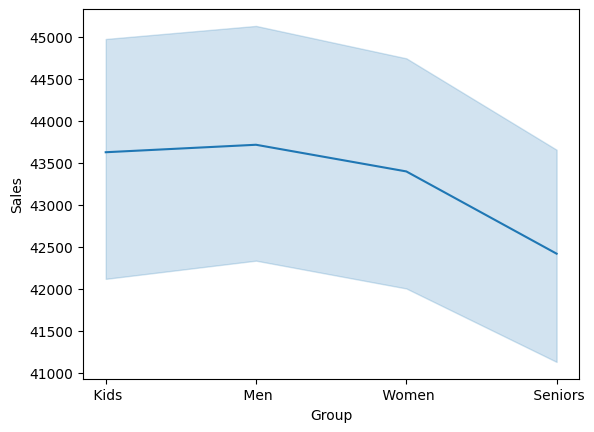

In [36]:
sns.lineplot(x='Group',y='Sales',data=df1)
plt.show()

#### Analysis:

#### The graph shows that the average sales for kids, men, women, and seniors are approximately equal.

In [37]:
#Finding Group generating Highest & Lowest sales using sum

highest_sales = df1.groupby('Group')['Sales'].sum().idxmax()
lowest_sales = df1.groupby('Group')['Sales'].sum().idxmin()
print('The group generating the highest sales is: ', highest_sales,'\n','The group generating the lowest sales is: ', lowest_sales)

The group generating the highest sales is:   Kids 
 The group generating the lowest sales is:   Seniors


In [38]:
#Finding State generating Highest & Lowest sales using sum

highest_sales = df1.groupby('State')['Sales'].sum().idxmax()
lowest_sales = df1.groupby('State')['Sales'].sum().idxmin()
print('The state generating the highest sales is: ', highest_sales,'\n','The state generating the lowest sales is: ', lowest_sales)

The state generating the highest sales is:   VIC 
 The state generating the lowest sales is:   WA


In [39]:
#Finding State generating Highest & Lowest sales using Mean Value

Grouped_sales = df1.groupby('State')['Sales'].mean()
print(Grouped_sales,'\n')
highest_sales = df1.groupby('State')['Sales'].mean().idxmax()
lowest_sales = df1.groupby('State')['Sales'].mean().idxmin()
print('The state generating the highest sales is: ', highest_sales,'\n','The state generating the lowest sales is: ', lowest_sales)

State
NSW    69416.666667
NT     20907.407407
QLD    30942.129630
SA     54497.685185
TAS    21074.074074
VIC    91149.425287
WA     20511.574074
Name: Sales, dtype: float64 

The state generating the highest sales is:   VIC 
 The state generating the lowest sales is:   WA


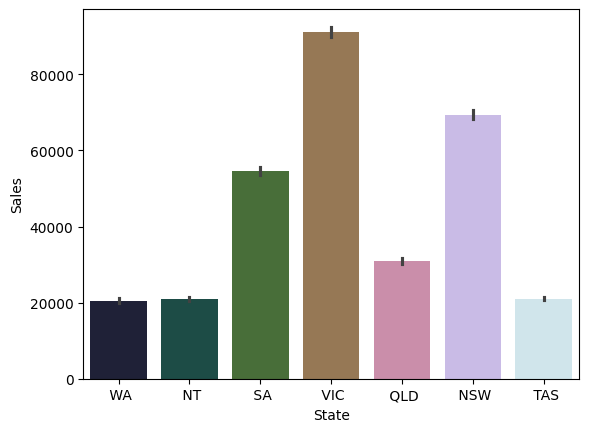

In [40]:
sns.barplot(x='State',y='Sales',data=df1, palette='cubehelix')
plt.show()

#### Analysis:

#### 1) The graph demonstrates that VIC has the highest average sales, indicating that VIC produces the most revenue, while WA has the lowest average sales among all the states. However, the average sales in WA, NT, and TAS are approximately equal.

#### 2) The sales in the VIC state is followed by the NSW and SA.

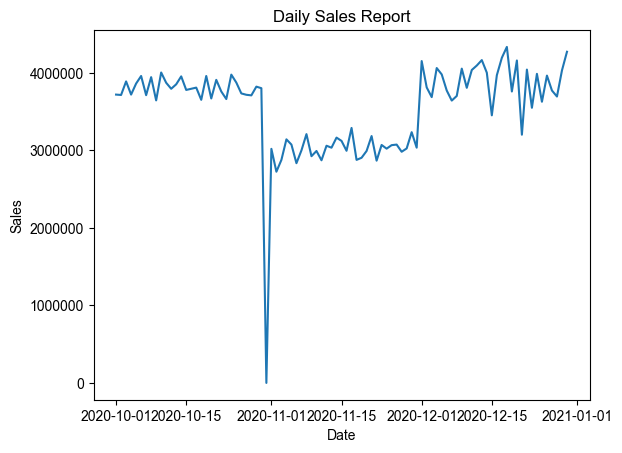

In [41]:
#Daily Sales Report

df2 = df1.set_index('Date')
daily_sales = df2.resample('D')['Sales'].sum()
sns.lineplot(data=daily_sales)
sns.set(rc={'figure.figsize':(8,3)})
plt.ticklabel_format(style='plain', axis='y')
plt.title('Daily Sales Report')
plt.show()

Weekly Sales Report: 
 Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    26502500
2020-12-13    27505000
2020-12-20    27875000
2020-12-27    26147500
2021-01-03    12000000
Freq: W-SUN, Name: Sales, dtype: int64


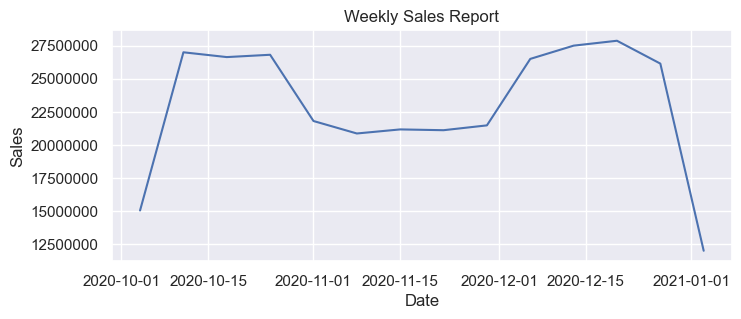

In [42]:
#Weekly Sales Report where week begins on Sunday.
weekly_sales = df2.resample('W-Sun')['Sales'].sum()
print('Weekly Sales Report:','\n',weekly_sales)
sns.lineplot(data=weekly_sales)
sns.set(rc={'figure.figsize':(8,3)})
plt.ticklabel_format(style='plain', axis='y')
plt.title('Weekly Sales Report')
plt.show()

Monthly Sales Report: 
 Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    116995000
Freq: ME, Name: Sales, dtype: int64


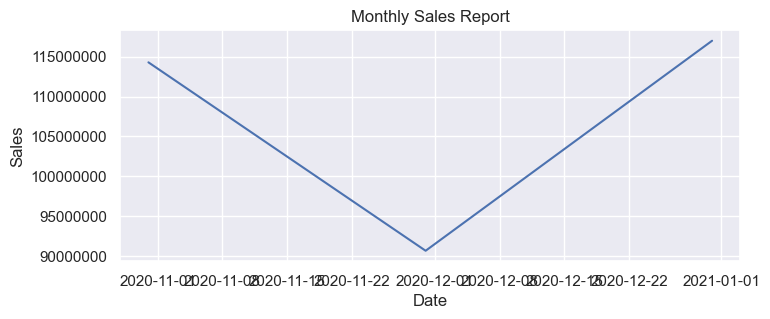

In [43]:
#Monthly Sales Report
monthly_sales = df2.resample('M')['Sales'].sum()
print('Monthly Sales Report:','\n',monthly_sales)
sns.lineplot(data=monthly_sales)
sns.set(rc={'figure.figsize':(12,3)})
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Sales Report')
plt.show()

#### Analysis:

#### 1) From the above Daily, Weekly and Monthly graphs, we can observe that month of November had the lowest sales, while December had the highest sales. 

#### 2) Sales in December are highly volatile compared to sales in October and November.

#### 3)In the daily chart, there is a negative spike at the beginning of November, indicating a significant decrease in sales.


Quarterly Sales Report: 
 Date
2020-12-31    321967500
Freq: QE-DEC, Name: Sales, dtype: int64


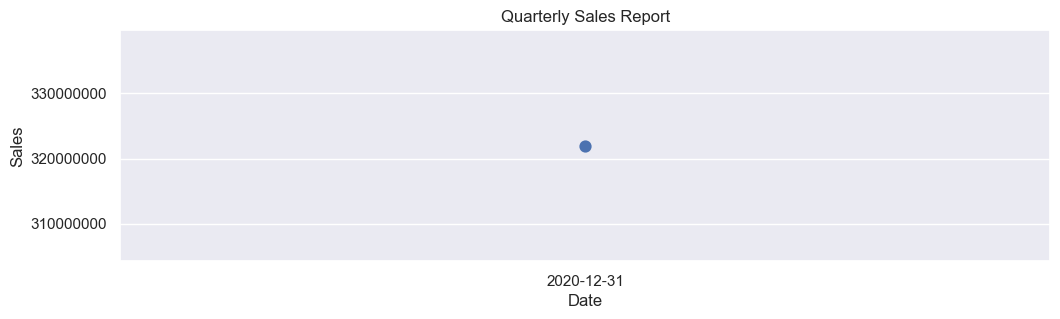

In [44]:
#Quarterly Sales Report
quarterly_sales = df2.resample('Q')['Sales'].sum()
print('Quarterly Sales Report:','\n',quarterly_sales)
sns.pointplot(data=quarterly_sales)
sns.set(rc={'figure.figsize':(8,3)})
plt.ticklabel_format(style='plain', axis='y')
plt.title('Quarterly Sales Report')
plt.show()

#### Analysis:

#### As the dataset contains data from just one quarter, the quarterly graph includes only one data point.

# Data Visualization

### State-wise sales analysis for different groups

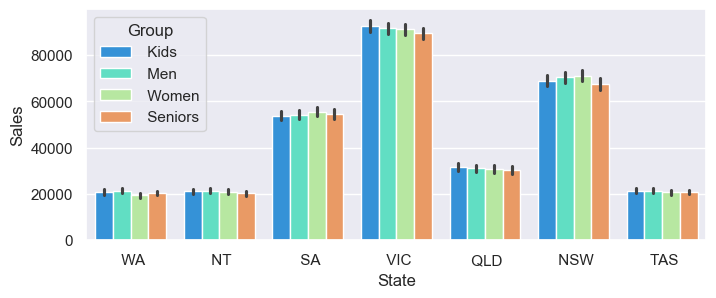

In [45]:
sns.barplot(x='State',y='Sales',data=df1,hue='Group', palette='rainbow')
plt.show()

#### Analysis:

#### 1) Most states show similar sales figures across kids, men, women, and seniors.
#### 2) The sales is highest in the VIC state and followed by NSW and SA.
#### 3) The lowest sales states are WA, NT and TAS.

### Group-wise sales analysis across different states

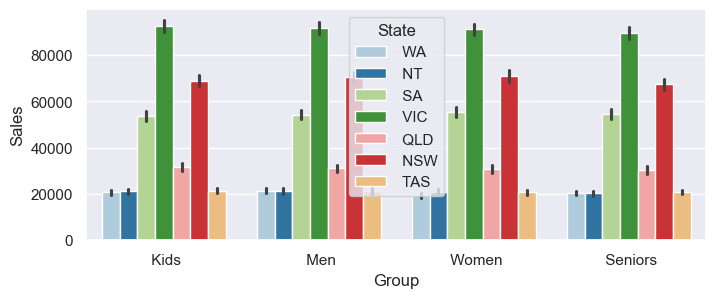

In [46]:
sns.barplot(x='Group',y='Sales',data=df1,hue='State', palette='Paired')
plt.show()

### Time of the day analysis

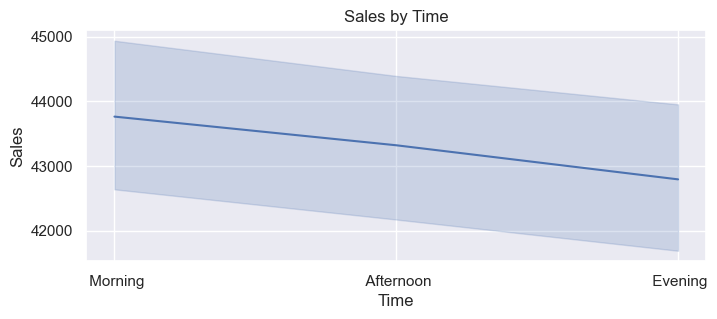

In [47]:
sns.lineplot(x='Time',y='Sales',data=df1)
plt.title('Sales by Time')
plt.show()

#### Analysis:

#### The graph shows that average sales slightly decline from morning to afternoon to evening, yet they remain nearly consistent throughout the day.

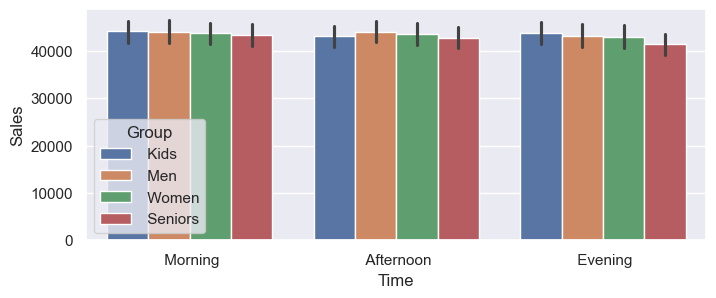

In [48]:
sns.barplot(x='Time',y='Sales',data=df1,hue='Group', palette='deep')
plt.show()

#### Analysis:

#### The graph indicates that the average sales for kids, men, women, and seniors during morning, afternoon, and evening are nearly identical.

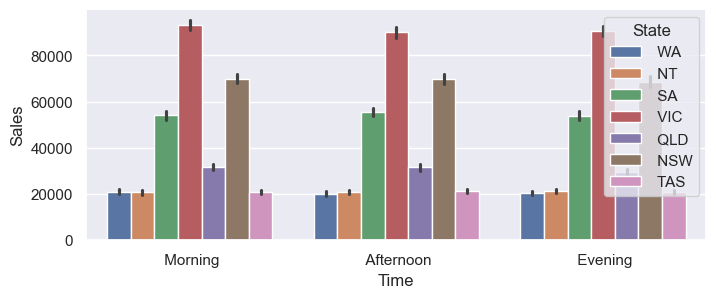

In [49]:
sns.barplot(x='Time',y='Sales',data=df1,hue='State')
plt.show()

#### Analysis:

#### The graph indicates that the average sales for various states during morning, afternoon, and evening are nearly identical.